In [4]:
import re
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块

# 定义函数以从文件中提取数据
def extract_data_from_log(file_path):
    data = {
        "InfiniGen (Ours)": []
    }
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if 'Total' in lines[i]:
                # 提取标签
                current_key = lines[i - 3].strip()
                # 提取数值
                total = float(lines[i].split(":")[1].split()[0])  # 只提取 Total 的数值部分
                data[current_key].append(total)

    return data

# 读取日志文件内容
log_file_path = "log"  # 替换为您的日志文件路径

# 提取数据
data = extract_data_from_log(log_file_path)

infinigen_totals = data["InfiniGen (Ours)"]  # InfiniGen 数据

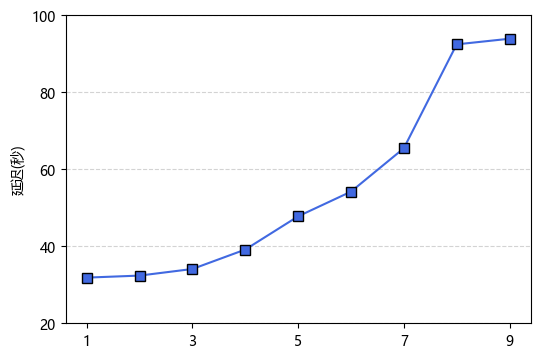

In [5]:
alpha_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# 创建图表和坐标轴
fig, ax1 = plt.subplots(figsize=(6,4))

# 设置x轴刻度，只显示 1, 3, 5, 7, 9
ax1.set_xticks([1, 3, 5, 7, 9])  # 关键修改：设置 x 轴刻度

# 绘制 Latency
ax1.plot(alpha_values, infinigen_totals, marker='s', markerfacecolor='royalblue', markeredgecolor='black', markersize=7, color='royalblue', label='Latency')
ax1.set_ylabel('延迟(秒)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim([20, 100])
ax1.set_yticks(range(20, 101, 20))

# 设置x轴刻度，与ax1保持一致 (可选，但推荐)
ax1.set_xticks([1, 3, 5, 7, 9]) # 关键修改：设置x轴刻度，与ax1保持一致

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()

# 添加网格线
ax1.grid(axis='y', linestyle='--', color='lightgray')


# 显示图像
plt.show()
fig.savefig('17a.pdf', dpi=300, bbox_inches='tight')